# AM120 HW08
## Zachary Miller

In [140]:
import numpy as np
import scipy.io
import scipy.spatial.distance as distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 1a i) and ii)
We are asked to create a random 140,000 standard normally distributed 2d vectors, and then to calculate their mean, variance, and covariance. We do this using the following equations
$$\bar{\vec{x}}= \frac{\sum_{i}^{n} x_i}{n}$$
$$Var(\vec{x}) = \frac{\sum_{i}^{n} (x_i-\bar{\vec{x}})^2}{n}$$
$$Cov(X) = XX^T/N$$
Doing this below...

In [26]:
np.random.seed(6968761)
N=140000
X=np.random.normal(size=(2,N))

# Function to calculate the row means
def calc_mean(arr):
    vec_sum = np.sum(arr, axis=1)
    return vec_sum/arr.shape[1]

# Function to calculate the row variances
def calc_variance(arr):
    mean_arr = calc_mean(arr)
    var_numer = np.sum(np.square(X-mean_arr.reshape(X.shape[0],-1)),
                      axis=1)
    var_denom = arr.shape[1]
    return var_numer/var_denom

# Function to calculate the covariance for a subset of the data points
def calc_covariance(arr, subset):
    arr_subset = arr[:,:subset]
    return np.matmul(arr_subset, arr_subset.T)/subset

comp_means = calc_mean(X)
comp_vars = calc_variance(X)
subsets = [14, 140, 1400, 14000, 140000]
    
print(f'Component Means: {comp_means}')
print(f'Component Variances: {comp_vars}')

for subset in subsets:
    cov_mat = calc_covariance(X, subset)
    print(f'Covariance Matrix for {subset} Data points:\n{cov_mat}')

Component Means: [-0.00255699 -0.00362471]
Component Variances: [1.00199433 1.0047822 ]
Covariance Matrix for 14 Data points:
[[ 1.04076445 -0.01401101]
 [-0.01401101  0.87987283]]
Covariance Matrix for 140 Data points:
[[ 0.84186369 -0.10970489]
 [-0.10970489  1.25297686]]
Covariance Matrix for 1400 Data points:
[[0.98446752 0.03978158]
 [0.03978158 0.98221125]]
Covariance Matrix for 14000 Data points:
[[ 1.00984748 -0.00111566]
 [-0.00111566  1.0014379 ]]
Covariance Matrix for 140000 Data points:
[[ 1.00200087 -0.00379688]
 [-0.00379688  1.00479534]]


The above component means and variances are very close to 0 and 1. This is to be expected since we drew each coordinate for each point from a standard normal distribution. The progression of the covariance matrices as we include more points also makes sense. Because all of the elements of both components were drawn independently, we would expect the covaraince matrix to be 1 along the diagonal (since each component has varaince 1) and zero everywhere else (since the variables are independent and therefore should have no covariance). For small N, we have more noise in the matrix, but as we increase N that noise gets smaller and we begin to converge towards the expected result. 

### 1b
We are told that the standard deviation for a cluster of uncorrelated 3d points is 2, 1, and 3 for each dimension, respectivly. Since we are told the data points are not coorelated, we know that the only nonzero terms of the covariance matrix will be the variance terms along the diagonal (which are the square of the standard deviations). Therefore, we can write the covariance matrix as 
$$C= \begin{bmatrix}4&0&0\\ 0&1&0\\ 0&0&25\end{bmatrix}$$
Now we are given the points $\vec{x_1}=[2,0,1]^T \text{ and } \vec{x_2}=[3,-1,4]^T$ and asked to calculate the Mahalanobis distance between these two points. We can do this using the equation $d(\vec{x_1},\vec{x_2})=\sqrt{(\vec{x_1}-\vec{x_2})^TC^{-1}(\vec{x_1}-\vec{x_2})}$. Calculating below...

In [38]:
# Define vectors and inverse cooelation matrix
x_1 = np.array([2,0,1]).reshape(3,1)
x_2 = np.array([3,-1,4]).reshape(3,1)
C_inv = np.array([[1/4, 0, 0],[0,1,0],[0,0,1/5]])

# Calculat the Mahalonobis distance
d_mbs = np.sqrt((x_1-x_2).T@C_inv@(x_1-x_2))[0,0]
print(f'Mahalonobis Distance between x_1 and x_2 = {d_mbs}')

Mahalonobis Distance between x_1 and x_2 = 1.746424919657298


In cases such as this one where the variance of the data in the cluster is different in different directions, it makes sense to use the Mahalanobis distance to measure points distances from the cluster since it takes into account this variablity change along different axis, which euclidean distance does not.

### 1c
Now we are told to calculate the covariance matrix for the set of 3d vectors given in the specified data file, and then to use that to calculate the Mahalanobis distance between $\vec{x_1}$ and $\vec{x_2}$. Doing this below...

In [67]:
# Load the data and look at its shape
data = scipy.io.loadmat('HW08_Mahalanobis.mat')
X=data['X']
print(f'Shape of data: {X.shape}')

# Subtract the mean from the data then calculate and print the covariance matrix
X_norm = X-np.mean(X, axis=1).reshape(3,-1)
C = (X_norm@X_norm.T)/X_norm.shape[1]
print(f'Covariance Matrix:\n', C)

# Get the inverse of the covariance matrix and print 
C_inv = np.linalg.inv(C)
print(f'Inverse Covariance Matrix:\n', C_inv)

# Calculate and print the Mahalonobis distance
d_mbs = np.sqrt((x_1-x_2).T@C_inv@(x_1-x_2))[0,0]
print(f'\nMahalonobis Distance between x_1 and x_2 = {d_mbs}')

Shape of data: (3, 20000)
Covariance Matrix:
 [[1.91843472 0.41467107 0.73318361]
 [0.41467107 0.85377    0.43108431]
 [0.73318361 0.43108431 2.28870323]]
Inverse Covariance Matrix:
 [[ 0.63109418 -0.22592535 -0.1596166 ]
 [-0.22592535  1.37525349 -0.18665829]
 [-0.1596166  -0.18665829  0.52321932]]

Mahalonobis Distance between x_1 and x_2 = 2.707290596091136


### 2a

In [69]:
X=np.array([[1, 9, 4, 5, 2, 9, 9, 9, 8, 5, 4, 8, 2, 8, 9, 3],
            [2, 8, 6, 6, 2, 7, 1, 2, 1, 5, 7, 7, 1, 2, 6, 2]])

We are given the above data and told to cluster using a self organizing map with points 8,9,10,11 as the representative points, a neighborhood kernal of 0.8 for the reference points, a neighborhood kernal of 0.1 for the gridspace points, and a constant learning rate of $\eta=0.1$

### 3a

In [104]:
X=np.array([[0, 0.5, 0.5, 0, 0, 0, 0.5, 0.5, 10, 9.5, 9.5, 10, 10, 9.5, 9.5, 10],
            [10, 10, 9.5, 9.5, 0, 0.5, 0.5, 0,0,0, 0.5, 0.5, 10, 10, 9.5, 9.5]])

We are given the above data and asked to cluster it using spectral clustering. We are told to define the similarity matrix $W=\{w_{i,j}\}$ such that $w_{i,j}=exp(-d_{i,j}/d)$ with $d_{i,j}$ the $L_2$ distance and d the root mean square of the euclidean distance matrix. Then, we define the Laplacian matrix $L=D-W$ with D the degree matrix and W as defined above. Calculating these values below... 

In [114]:
W = distance.squareform(distance.pdist(X.T)); d = np.sqrt(np.mean(np.square(W)))
W = np.exp(-W/d)
D = np.diag(np.sum(W,axis=1))
L = D-W

print('W:\n', W)
print('\nD:\n',D)
print('\nL:\n',L)

W:
 [[1.         0.9487985  0.92836583 0.9487985  0.34952623 0.36838826
  0.36787944 0.34906755 0.22614287 0.23459375 0.24359242 0.23459375
  0.34952623 0.36838826 0.36787944 0.34906755]
 [0.9487985  1.         0.9487985  0.92836583 0.34906755 0.36787944
  0.36838826 0.34952623 0.23459375 0.24311673 0.25268887 0.24359242
  0.36838826 0.38826818 0.38770217 0.36787944]
 [0.92836583 0.9487985  1.         0.9487985  0.36787944 0.38770217
  0.38826818 0.36838826 0.24359242 0.25268887 0.26238839 0.25268887
  0.36787944 0.38770217 0.38826818 0.36838826]
 [0.9487985  0.92836583 0.9487985  1.         0.36838826 0.38826818
  0.38770217 0.36787944 0.23459375 0.24359242 0.25268887 0.24311673
  0.34906755 0.36787944 0.36838826 0.34952623]
 [0.34952623 0.34906755 0.36787944 0.36838826 1.         0.9487985
  0.92836583 0.9487985  0.34952623 0.36838826 0.36787944 0.34906755
  0.22614287 0.23459375 0.24359242 0.23459375]
 [0.36838826 0.36787944 0.38770217 0.38826818 0.9487985  1.
  0.9487985  0.9283658

Now we calculate and plot the eigenvalues of L to detirmine the number of clusters. Doing this below...

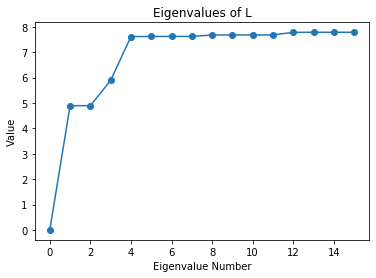

In [129]:
# Calculate the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(L)

# Sort the eigenvalues and cooresponding eigenvectors in increasing order
inds = eigvals.argsort()
eigvecs = eigvecs [:,inds]
eigvals = eigvals[inds]

plt.plot(eigvals, '-o')
plt.title('Eigenvalues of L')
plt.ylabel('Value')
plt.xlabel('Eigenvalue Number')
plt.show()

Looking at the above plot, we see three non-zero eigenvalues that are significantly smaller than the rest, so we take four clusters (k+1).

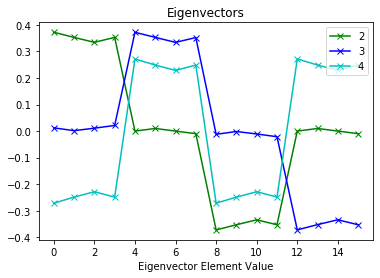

In [151]:
color ='rgbcmyrgbcmyrgbcmyrgbcmy'
for i in range(1,4):
        hl=plt.plot(eigvecs[:,i], color[i]+'x-');
plt.title('Eigenvectors')
plt.xlabel('Eigenvector Element Index')
plt.xlabel('Eigenvector Element Value')
plt.legend(['2','3','4']);
plt.show()

Now we cluster a new matrix $F_{4x16}$ made from combining the first 4 eigenvectors into one data matrix. The cluster label assigned to each column of $F$ is then given to the original 2d points. Performing this clustering and plotting below...

Text(0, 0.5, 'Y')

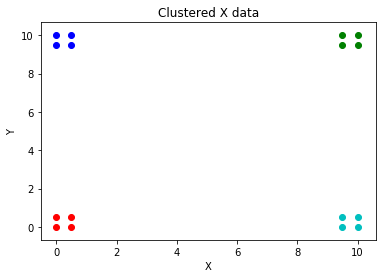

In [153]:
k = 4
kmeans = KMeans(n_clusters=k,n_init=5,copy_x=True).fit(eigvecs[:,0:k])
idx = kmeans.labels_
C = kmeans.cluster_centers_

for i in range(X.shape[1]):
    plt.scatter(X[0,i], X[1,i], c=color[idx[i]])
    
plt.title('Clustered X data')
plt.xlabel('X')
plt.ylabel('Y')